# Session 3: Logistic Regression with SciKitLearn 

In this session we use SciKitLearn to performe logistic regression.

Using a set of independent variables, a logistic regression predicts the likelihood of the dependent variable occuring. It's good for classification problems, such as seeing if certain factors can predict certain outcomes will be the case for children. We often use a logistic regression to generate odds ratios, which can give us an idea if an outcome will or won't happen in a given case. Above 1 is more likely, below one is less likely.

We will also cover ways to tune the model but using python to tune the models for us which is the benifit of using python to run the models.


In [1]:
# Set up 

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Loading Data 
df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Really this data needs some cleaning done to it as htere's some zero values where there shouldn't be. Removing them makes our data set smaller, but improves data quality. Another option could be filling them with new values, for instance ones that fit to a normal distribution.

In [3]:
# Making a list of columns minus the Outcome column
features = list(df.columns)
features = features[0:8]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

By creating the list of features (our independant varaibles) we can easily subset out columns into the X and y variables for our SciKitLearn set up: assigning X and Y, then spliting data into training and testing. 

In [4]:
# Assignimng Variables 

X = df[features]  # everything except outcome 
y = df['Outcome']

# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
409,1,172,68,49,579,42.4,0.702,28
63,2,141,58,34,128,25.4,0.699,24
61,8,133,72,0,0,32.9,0.270,39
405,2,123,48,32,165,42.1,0.520,26
747,1,81,74,41,57,46.3,1.096,32
...,...,...,...,...,...,...,...,...
269,2,146,0,0,0,27.5,0.240,28
337,5,115,76,0,0,31.2,0.343,44
91,4,123,80,15,176,32.0,0.443,34
80,3,113,44,13,0,22.4,0.140,22


## Setting up our Logistic Regression Model 

In [5]:

# Initialise an logistic model class object
lr = LogisticRegression(
    random_state=1,  # RAndo Seed
    max_iter=400     # Avoid overiterating 
)

# Fit the data to to model
lr.fit(X_train, y_train)

# Make predictions on the test data using the model 
y_pred = lr.predict(X_test)

# Do our predictions match?
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[139,  10],
       [ 40,  42]])

A confusion matrix is a table that is used to define the performance of a classification algorithm.

Once we have created a confustion matrix that records teh accuraacy of our binary predictions copared to thr real value, we can map this out visually using a heatmap.

Text(0.5, 1.0, 'Confusion Matrix')

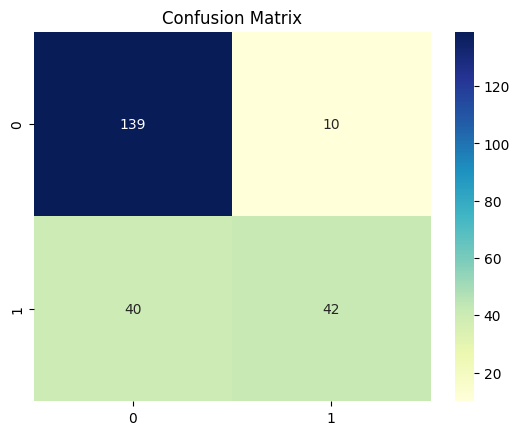

In [6]:
# Import plotting librarys 
import matplotlib.pyplot as plt 
import seaborn as sns 


# Class names
class_names = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))  # only 2 herew but its a re[peatable process 

# Set the axis to 0 and 1 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Create a heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix),
            annot=True,
            cmap="YlGnBu" , # colour map
            fmt='g'  
            )

plt.title('Confusion Matrix')

## Classification Report 

Precision: Percentage of correct positive predictions relative to total positive predictions.

Recall: Percentage of correct positive predictions relative to total actual positives.

F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall) Using these three metrics, we can understand how well a given classification model is able to predict the outcomes for some response variable.

Fortunately, when fitting a classification model in Python we can use the classification_report() function from the sklearn library to generate all three of these metrics.

The following example shows how to use this function in practice.

In [7]:
# 

from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']

output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(output_report)
print(output_report['accuracy'])
output_report

{'without diabetes': {'precision': 0.776536312849162, 'recall': 0.9328859060402684, 'f1-score': 0.8475609756097561, 'support': 149.0}, 'with diabetes': {'precision': 0.8076923076923077, 'recall': 0.5121951219512195, 'f1-score': 0.6268656716417911, 'support': 82.0}, 'accuracy': 0.7835497835497836, 'macro avg': {'precision': 0.7921143102707349, 'recall': 0.7225405139957439, 'f1-score': 0.7372133236257736, 'support': 231.0}, 'weighted avg': {'precision': 0.787596016646296, 'recall': 0.7835497835497836, 'f1-score': 0.7692189196557597, 'support': 231.0}}
0.7835497835497836


{'without diabetes': {'precision': 0.776536312849162,
  'recall': 0.9328859060402684,
  'f1-score': 0.8475609756097561,
  'support': 149.0},
 'with diabetes': {'precision': 0.8076923076923077,
  'recall': 0.5121951219512195,
  'f1-score': 0.6268656716417911,
  'support': 82.0},
 'accuracy': 0.7835497835497836,
 'macro avg': {'precision': 0.7921143102707349,
  'recall': 0.7225405139957439,
  'f1-score': 0.7372133236257736,
  'support': 231.0},
 'weighted avg': {'precision': 0.787596016646296,
  'recall': 0.7835497835497836,
  'f1-score': 0.7692189196557597,
  'support': 231.0}}

Classification: ROC and AUC  |  Machine Learning  |  Google for Developers


# ROC Curve 

The ROC curve is a visual representation of model performance across all thresholds. The long version of the name, receiver operating characteristic, is a holdover from WWII radar detection.

The ROC curve is drawn by calculating the true positive rate (TPR) and false positive rate (FPR) at every possible threshold (in practice, at selected intervals), then graphing TPR over FPR. 

It's a demonstration of the probability, if given a positive and negative outcome, that it will rank the positive outcome over the negative one. If given the data for a positive and negative diabetes outcome, how likely is it that it will predict the positive is positve and the negative is negative.

A perfect model would have a straight line at 1 going all the way across. A model that's no better than a coin flip would be a 45 degree line.

Our model is better than flipping a coin.

The points closest to 0,1 represent the range of the best preforming thresholds for the model. We need to choose a threshold that suits out case. As false negatives for diabetes are costly, we want a threshold that doesn't risk that, even if it's worse for our true positive rate.

We can alter our threshold (standard is 0.5) by altering the line: y_pred_proba = lr.predict_proba(X_test)[::,1] to y_pred_proba = (lr.predict_proba(X_test)[::,1] >= new_threshold).astype(int)

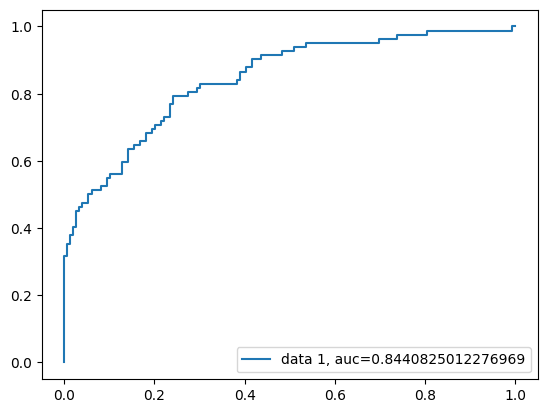

In [8]:
# Lets look at the area under the curve 

y_pred_proba = lr.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)
plt.show()

# Identifying the best predictors 

Here we are going to rebuild the model over and over using every possible combination of features to find the one that builds the best model, we'll then print that and use it going forward.

We could then go on and re-do what we've done earlier with that new feature set.

We loop through each combination of predictor variables and create a new model using them. If the accuracy level is higher than any of the models before it then we update the accracy level and save that combination as the best comintation of predictors. At the end we are left with the best conbination of predictor variables and what the accuracy level was for that model. 

In [9]:
import itertools 

combinations = []

# loop over the different combinations of predictors 
for i in range(1, 9):
    combs = list(itertools.combinations(features, i))
    combinations.extend(combs)

# create objects to store the top results
accuracy = 0
best_X = 0

# Put the whole workflow in a loop

y = df['Outcome']

for features in combinations:
    X = df[list(features)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    lr_iter = LogisticRegression(random_state=1, max_iter=400)
    lr_iter.fit(X_train, y_train)
    y_pred = lr_iter.predict(X_test)

    output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

    # what features give us highest accuracy 
    acc = output_report['accuracy']
    # if acc
    if acc > accuracy:
        accuracy = acc
        best_X = list(features)

print(best_X)
print(accuracy)



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespa

['Pregnancies', 'Glucose', 'BloodPressure', 'BMI']
0.7922077922077922
